In [1]:
import pandas as pd
import h5py
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [17]:
#라벨 파일 불러오기
train_label = pd.read_csv("./input2/train.csv")
print(train_label.head())
print(train_label.shape)
sub_label = pd.read_csv("./input2/sample_submission.csv")
print(sub_label.head())
print(sub_label.shape)

#이미지 파일 불러오기
train_image = h5py.File("./input2/train.h5", 'r')
test_image = h5py.File("./input2/test.h5", 'r')

#이미지와 라벨 파일 합치기
train_all = [np.array(train_image[str(i)]) for i in tqdm(train_label["ID"][0:500])]
test_all = [np.array(test_image[str(i)]) for i in tqdm(sub_label["ID"][0:500])]
#str은 숫자를 문자열로 바꿔주는 함수

   ID  label
0   0      5
1   1      0
2   2      4
3   3      1
4   4      9
(50000, 2)
      ID  label
0  50000     -1
1  50001     -1
2  50002     -1
3  50003     -1
4  50004     -1
(40000, 2)



100%|██████████| 500/500 [00:01<00:00, 463.06it/s]

100%|██████████| 500/500 [00:01<00:00, 323.89it/s]


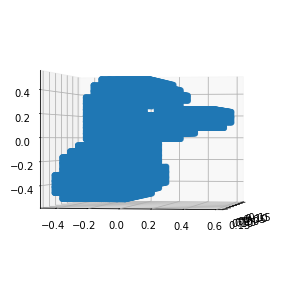

In [29]:
#그래프 객체 지정
fig = plt.figure(figsize=(5, 5))
ax0 = fig.add_subplot(111, projection="3d")
#add_subplot은 그래프를 여러 개 그릴 때 사용하는 함수
#인수 abc의 의미: a*b 그리드의 c번째 서브 플롯

idx = 499

#데이터가 각각 (x,y,z)점들로 이루어져 있으므로 지정하여 산점도를 그린다.
x0 = train_all[idx][:, 0] 
y0 = train_all[idx][:, 1]
z0 = train_all[idx][:, 2]

ax0.view_init(0, 10)
#3d 그래프의 보여지는 각도를 바꾸는 함수
#view_init(a,b)에서 a도만큼 높낮이가 바뀌고 b도만큼 x,y축이 회전한다.
ax0.scatter(x0, y0, z0)

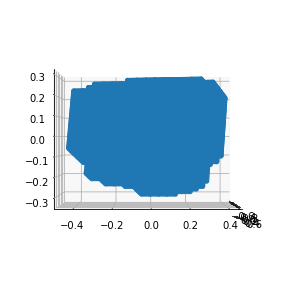

In [54]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111, projection="3d")

idx = 45

x1 = test_all[idx][:, 0]
y1 = test_all[idx][:, 1]
z1 = test_all[idx][:, 2]

ax1.view_init(0, 0)
ax1.scatter(x1, y1, z1)

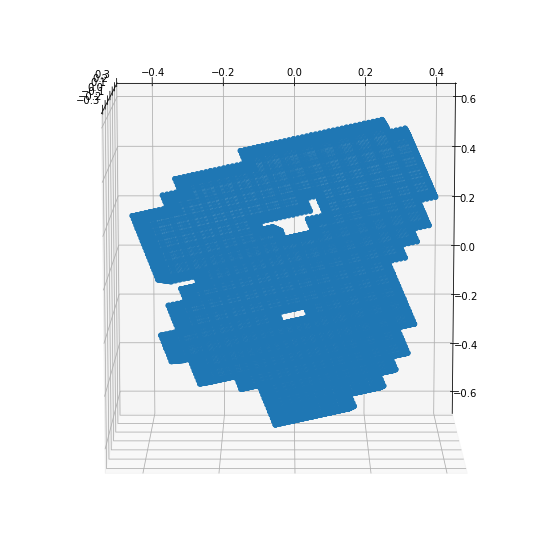

In [52]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection="3d")

idx = 45

x1 = test_all[idx][:, 0]
y1 = test_all[idx][:, 1]
z1 = test_all[idx][:, 2]

ax1.view_init(-80, 0)
ax1.scatter(x1, y1, z1)

- (0,0)에서는 돌아가서 보이지 않지만 (-80,0)에서는 확인할 수 있다는걸 알 수 있다.